In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [65]:
df= pd.read_csv('TSLA.csv')

In [66]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0


In [67]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,758.000000,758.000000,758.000000,758.000000,7.580000e+02,758.0,758.000000
mean,485.876984,497.135347,473.316225,485.531513,4.693252e+07,0.0,0.006596
std,353.897173,361.762103,344.581855,353.160353,3.393843e+07,0.0,0.181608
min,36.220001,37.335999,35.397999,35.793999,9.800600e+06,0.0,0.000000
25%,113.061998,115.117502,109.650499,112.323500,2.431762e+07,0.0,0.000000
50%,485.494995,501.315002,458.930008,488.125000,3.448050e+07,0.0,0.000000
75%,766.029984,779.285019,748.804977,762.142502,6.008200e+07,0.0,0.000000
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08,0.0,5.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          758 non-null    object 
 1   Open          758 non-null    float64
 2   High          758 non-null    float64
 3   Low           758 non-null    float64
 4   Close         758 non-null    float64
 5   Volume        758 non-null    int64  
 6   Dividends     758 non-null    int64  
 7   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 47.5+ KB


In [69]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<AxesSubplot: >

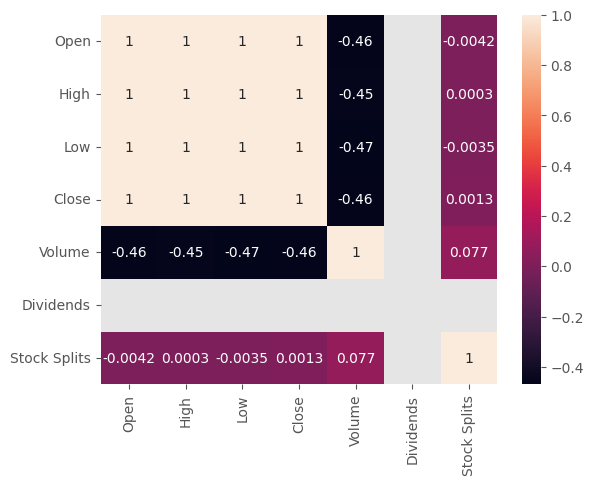

In [70]:
sns.heatmap(df.corr(),annot=True)

In [71]:
df=df[['Date','Close']]

In [72]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


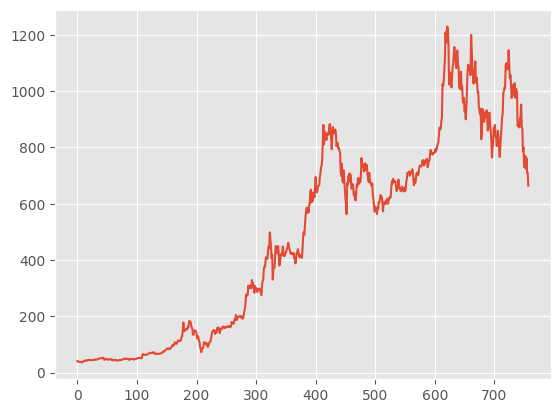

In [73]:
plt.plot(df['Close'])

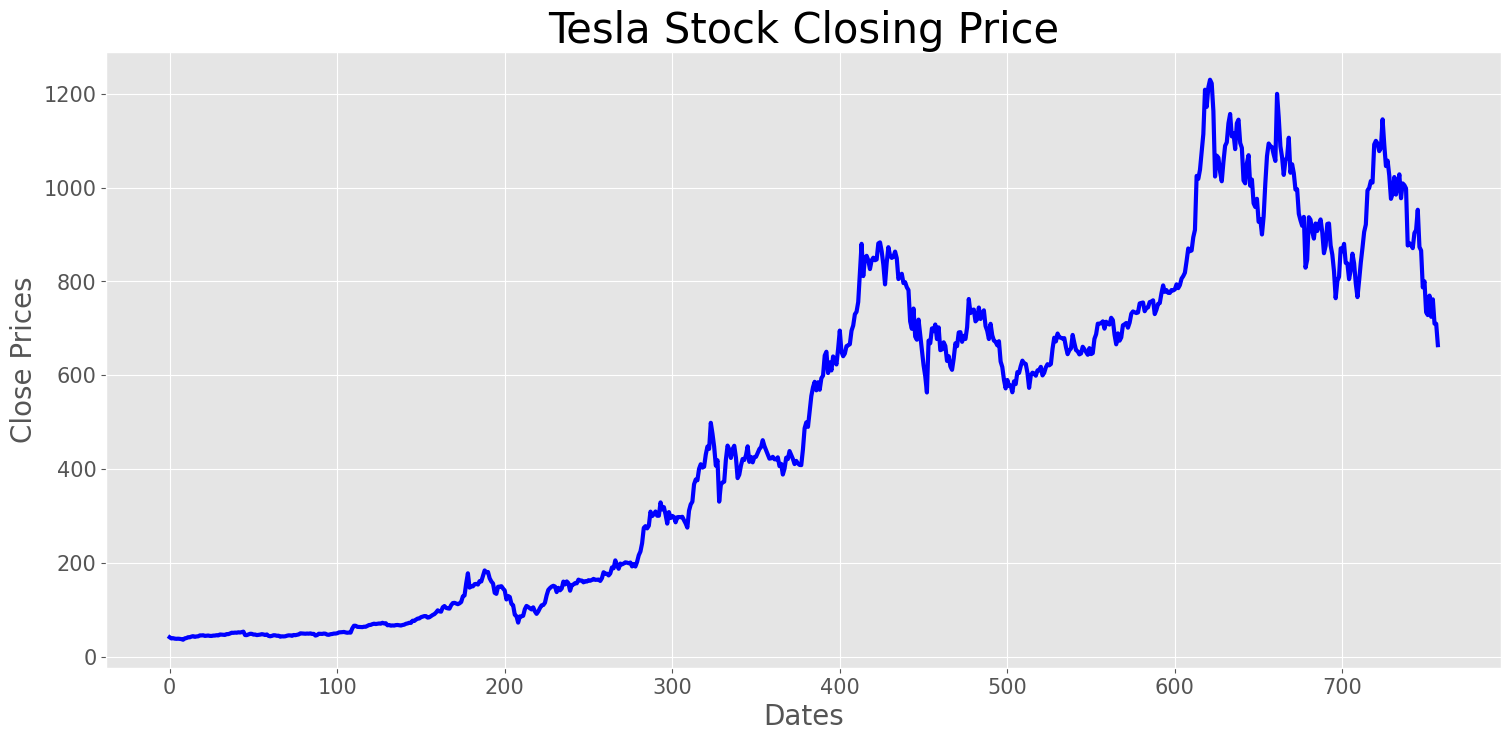

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(df['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

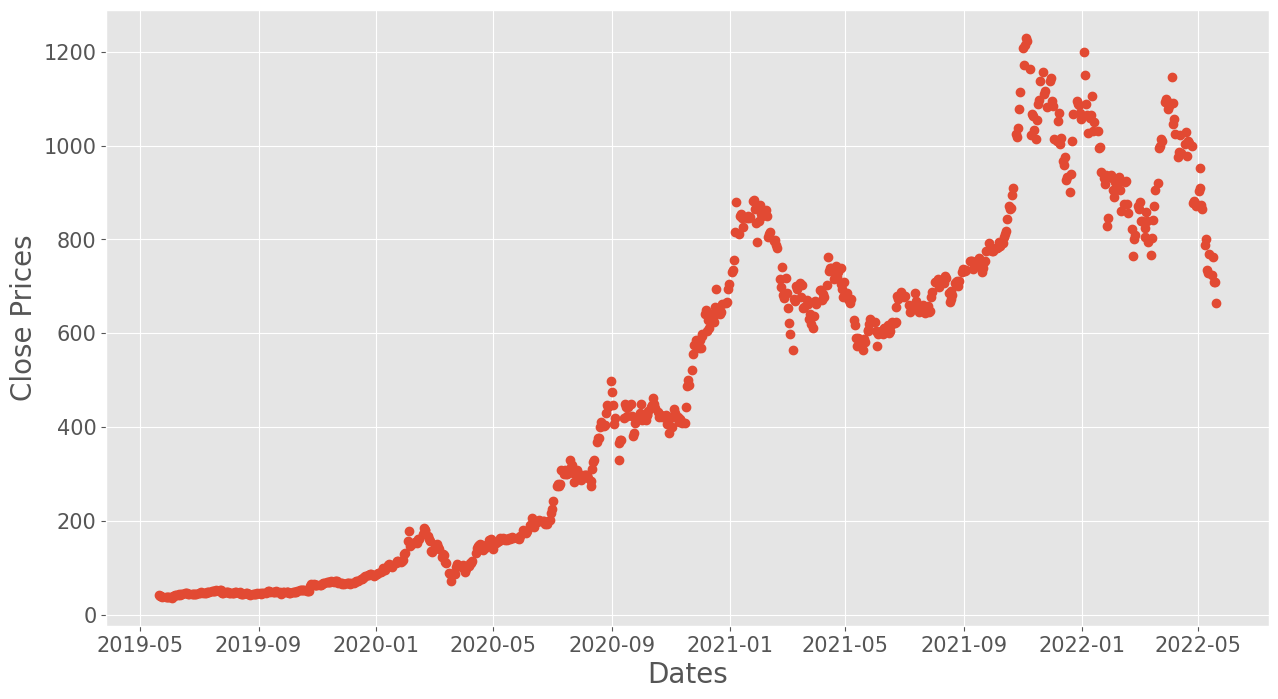

In [75]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot_date(df['Date'],df['Close'])

<AxesSubplot: xlabel='Close', ylabel='Count'>

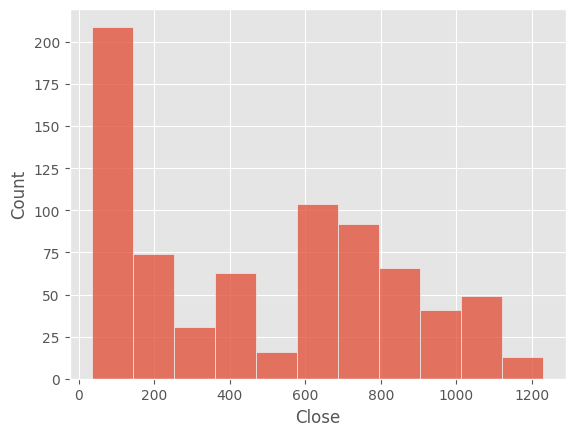

In [76]:
sns.histplot(df['Close'])

<AxesSubplot: >

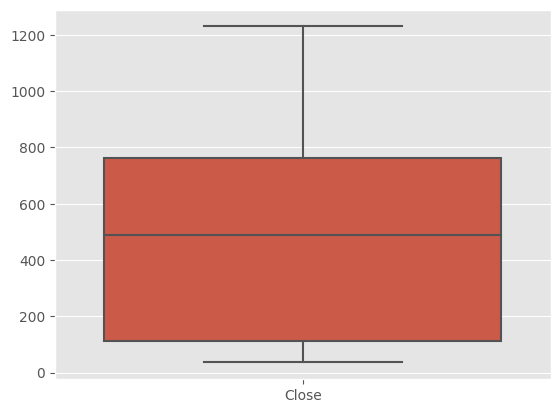

In [77]:
sns.boxplot(df)

<AxesSubplot: xlabel='Close', ylabel='Density'>

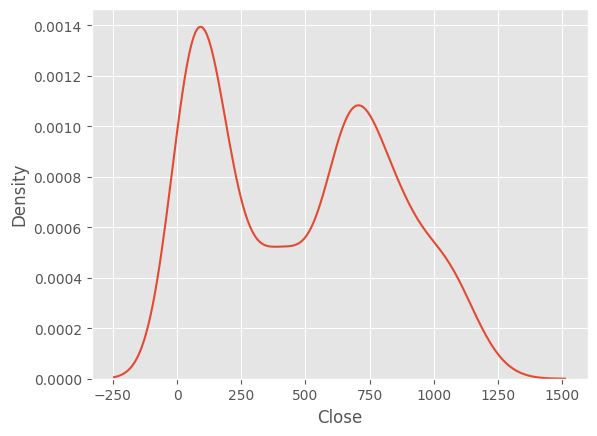

In [78]:
sns.kdeplot(df['Close'])

In [79]:
# df=df.set_index(df['Date'])

In [80]:
# df.drop(columns='Date',inplace=True)

In [81]:
# Moving Average 

In [82]:
rolmean=df['Close'].rolling(window=130).mean()
rolstd=df['Close'].rolling(22).std()

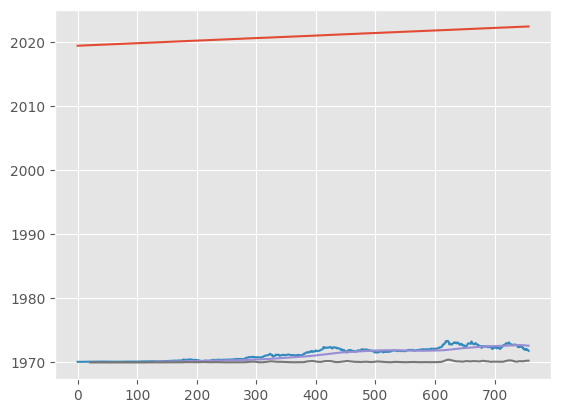

In [83]:
plt.plot(df)
plt.plot(rolmean)
plt.plot(rolstd)
plt.grid('both')

In [84]:
# Ada fuller test 

In [85]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(df['Close'])
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])

In [86]:
output
# p>0.05 so non stationary

Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
dtype: float64

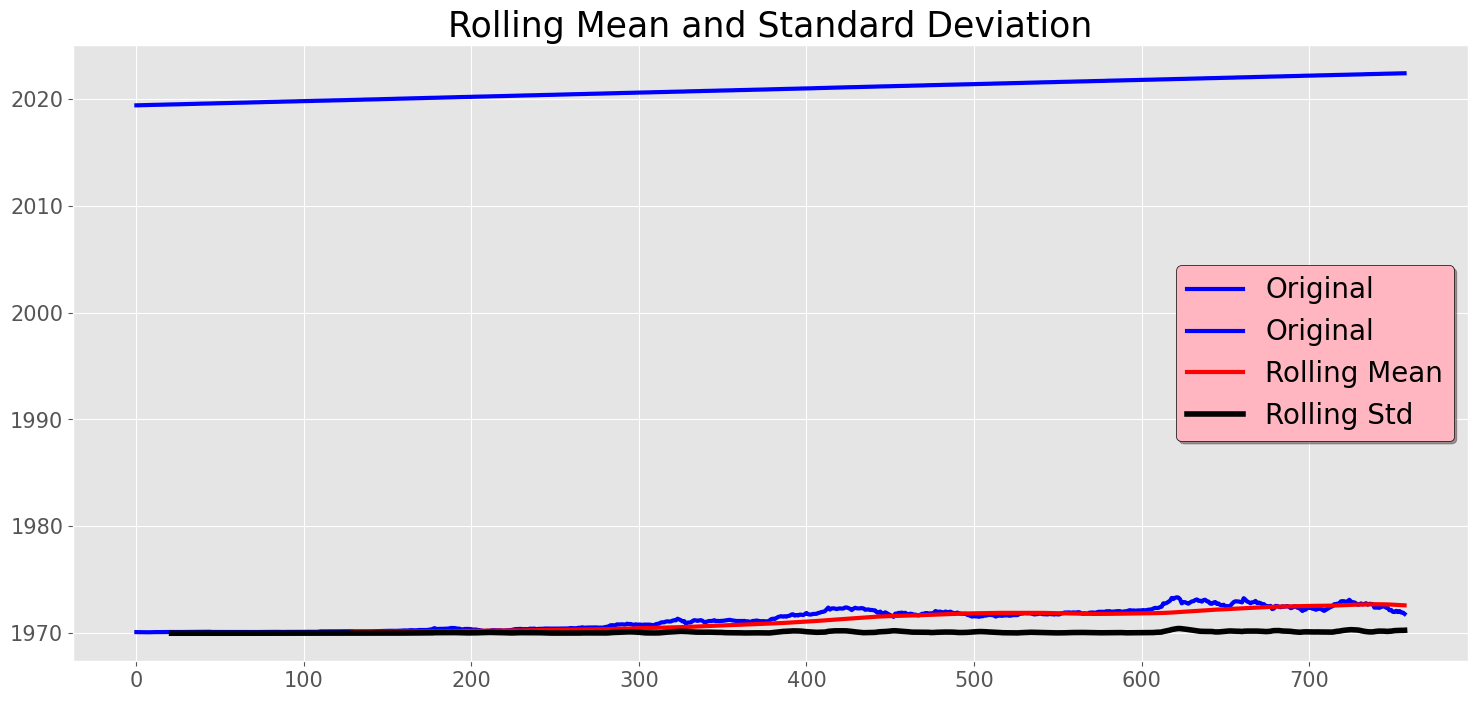

In [87]:
 # Plot rolling statistics:
plt.figure(figsize = (18,8))
plt.grid('both')
plt.plot(df, color='blue',label='Original', linewidth = 3)
plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show(block=False)

In [88]:
# Time serie Decomposition 

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [90]:
result=seasonal_decompose(x=df['Close'],period=10)

<Figure size 2000x1000 with 0 Axes>

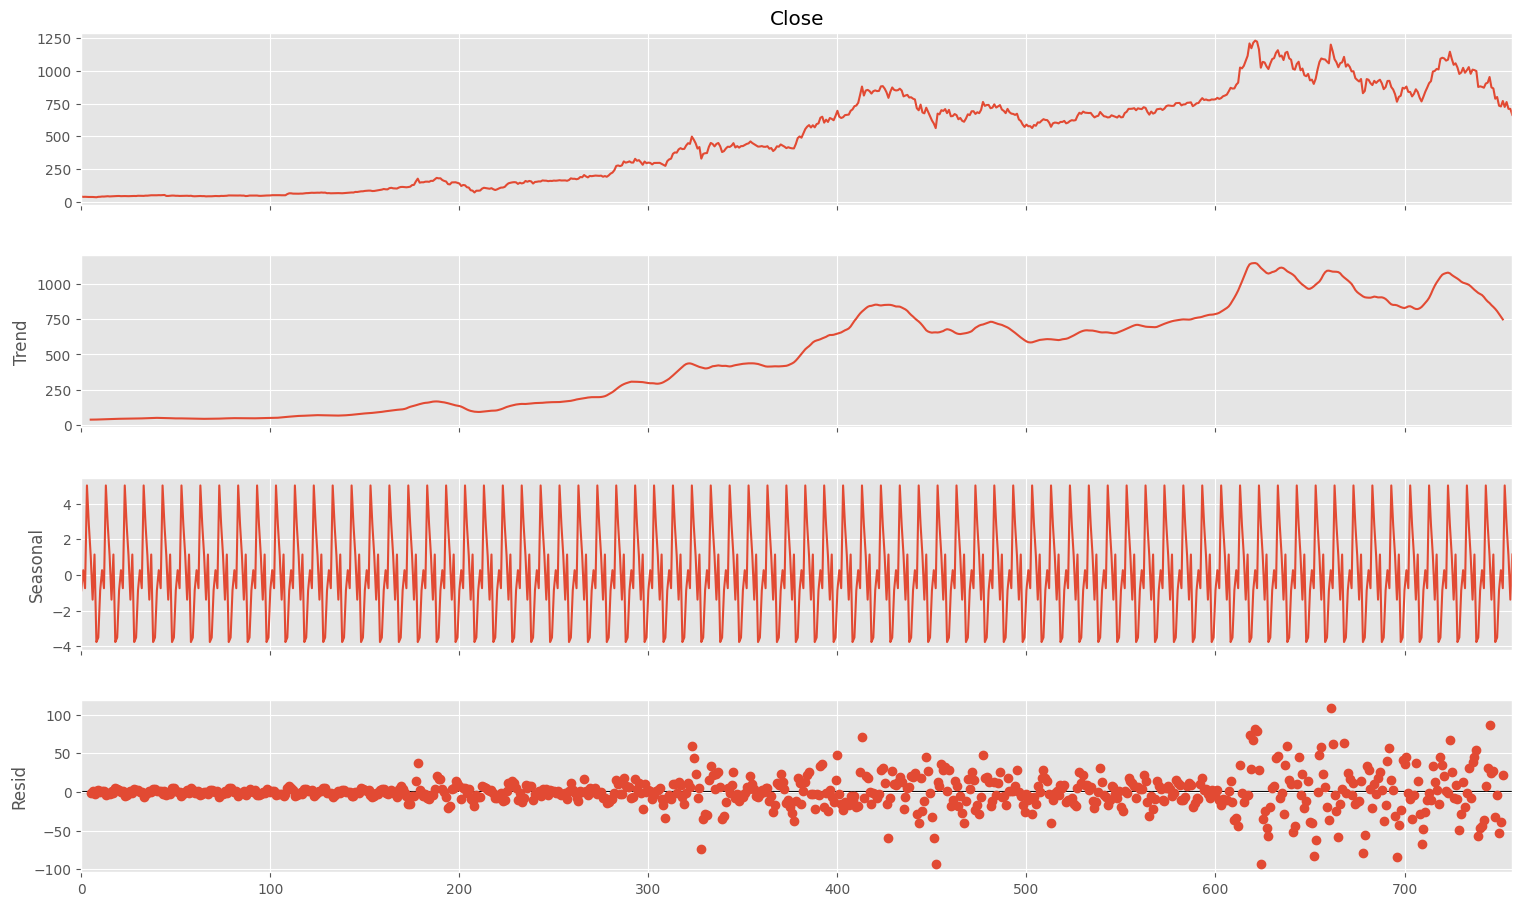

In [91]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [92]:
# ACF Pacf

In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

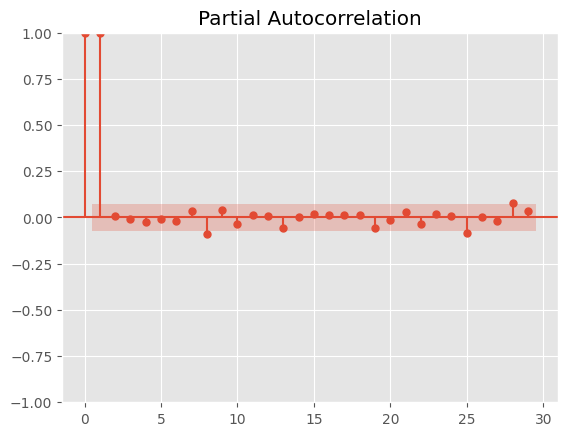

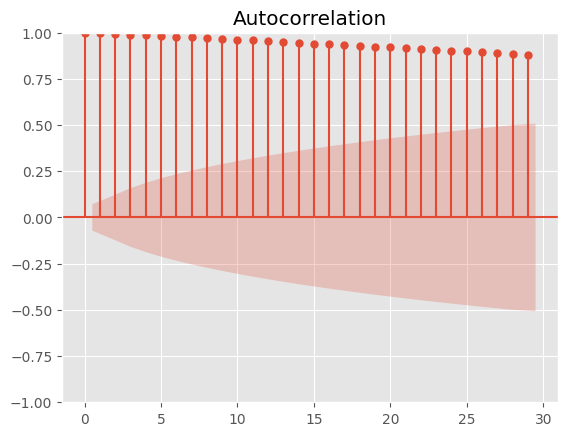

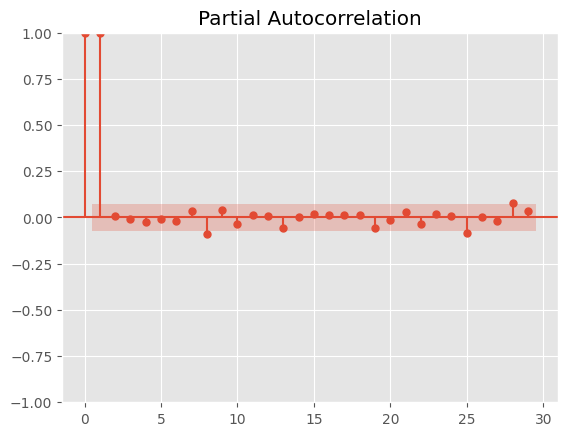

In [94]:
plot_acf(df['Close'])
plot_pacf(df['Close'])

# MODEL TRAINING

In [95]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [96]:
history =[x  for x in df['Close']]

In [97]:
X_train=df['Close'][:-60]



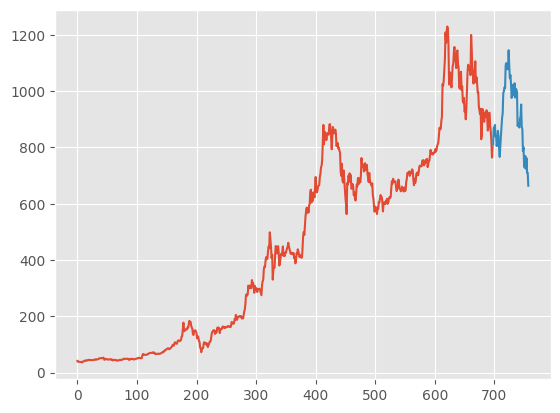

In [98]:
X_test=df['Close'][-60:]

plt.plot(X_train)
plt.plot(X_test)
# plt.plot(X_train)

In [99]:
def train_arima_model(X, y, arima_order):
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [100]:
p=range(0,3)
q=range(0,3)
d=range(0,3)
best_score , best_order = float("inf"),0

for i in p:
    for j in q:
        for k in d:
            order=(i,j,k) 
            try:
                rmse = train_arima_model(X_train,X_test,order)
                if rmse < best_score:
                    best_score,best_order = rmse,order
            except:
                  continue
                

In [101]:
best_score ,best_order 
X_test_1.iloc[1]

index    699.000000
Close    870.429993
Name: 1, dtype: float64

In [107]:
X_test_1 = X_test.reset_index(drop=False)  


history = [x for x in X_train]
y_pred = list()

for t in range(len(X_test_1)):
    model = ARIMA(history, order=best_order)
    model_fit= model.fit()
    fc = model_fit.forecast(alpha=0.05)
    y_pred.append(fc[0])
    history.append(X_test_1.iloc[t][1])  

print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(X_test_1['Close'], y_pred)))


RMSE of ARIMA Model: 39.55461775564248


In [108]:
fc_series= pd.Series(y_pred)

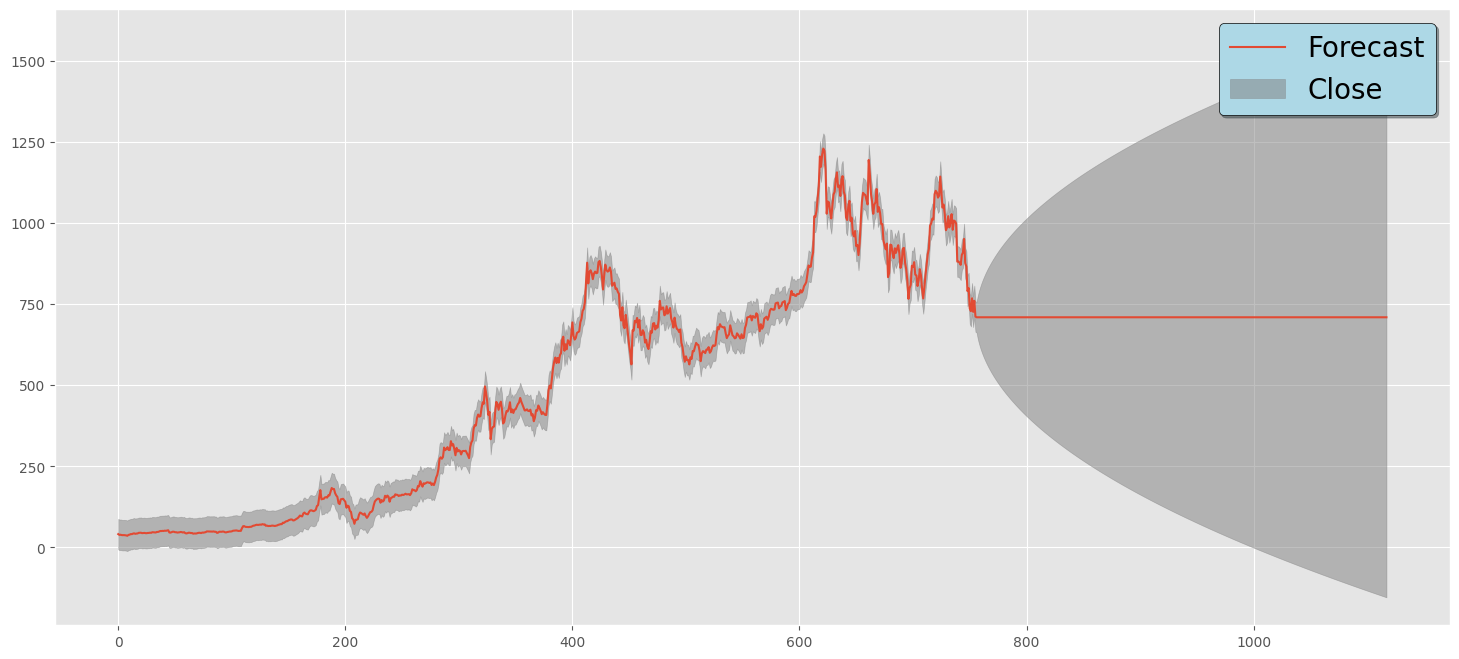

In [109]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df)+360, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [110]:
fc_series.index= X_test.index

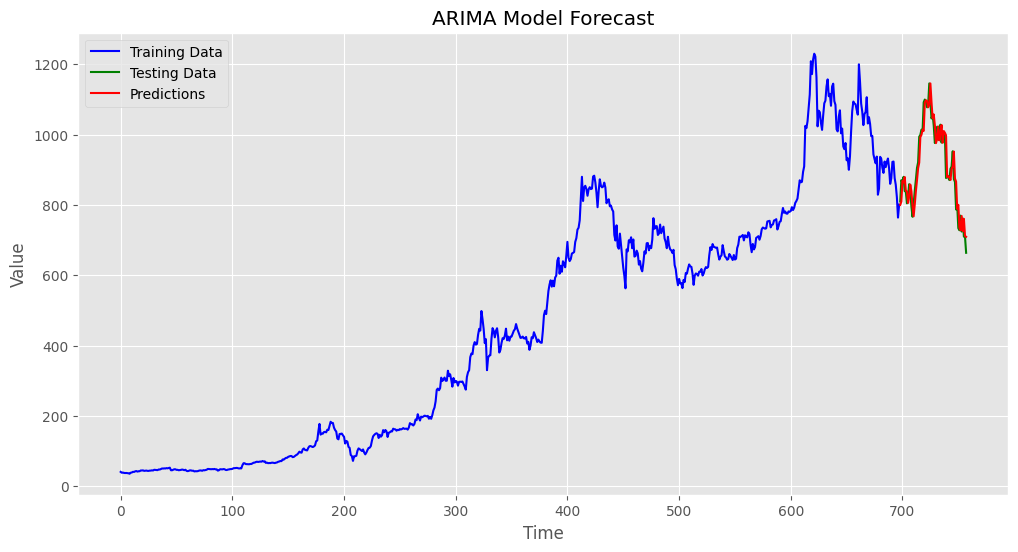

In [111]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(X_train, label='Training Data', color='blue')
plt.plot( X_test, label='Testing Data', color='green')
plt.plot( fc_series, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

In [113]:
len(fc_series)

60

In [117]:
from statsmodels.graphics.tsaplots import plot_predict

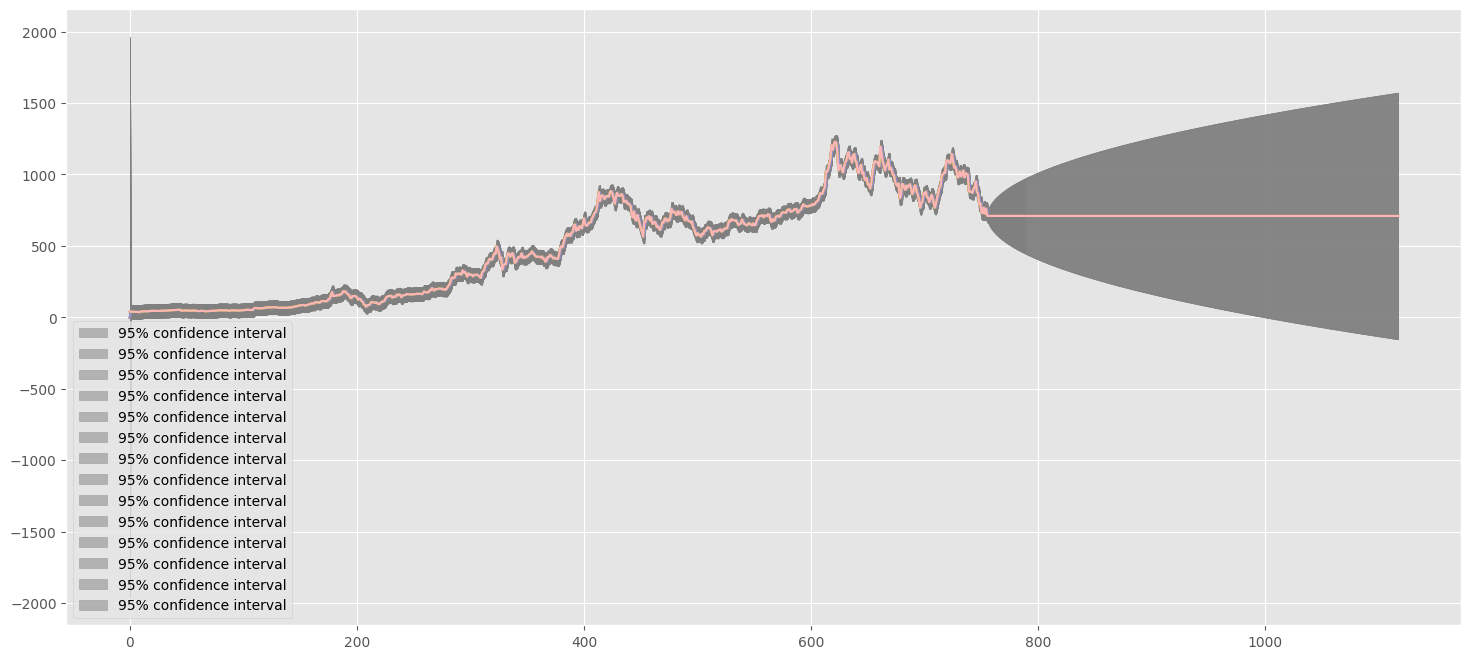

In [169]:
plot_predict(model_fit,1,len(df['Close'])+360,ax=ax1)

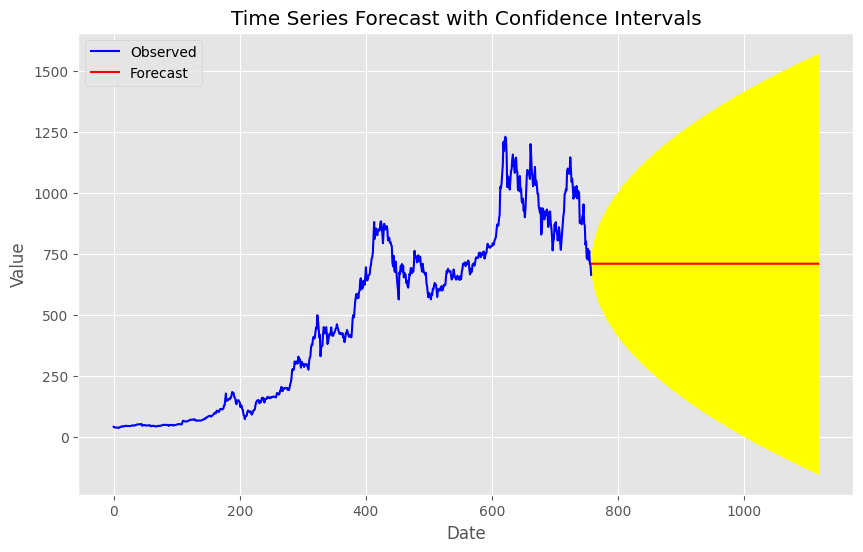

In [171]:
forecast_steps = 360
forecast_results = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(len(df)), df['Close'], label='Observed', color='blue')
plt.plot(range(len(df), len(df) + forecast_steps), forecast_mean, label='Forecast', color='red')

# Fill the area between the confidence intervals in pink
plt.fill_between(range(len(df), len(df) + forecast_steps),forecast_ci[:, 0],forecast_ci[:, 1],color='yellow')



plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Forecast with Confidence Intervals')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# SARIMA MODEL

In [180]:
import statsmodels.api as sm
history = [x for x in X_train]
y_pred = list()
for t in range(len(X_test_1)):
    model = sm.tsa.SARIMAX(X_train, order=(0,1,0), seasonal_order=(1,1,1,3))  # seasonal= 3 days 
    model_fit= model.fit()
    fc = model_fit.forecast()
    y_pred.append(fc.iloc[0])
    history.append(X_test_1.iloc[t][1])

print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(X_test_1['Close'], y_pred)))

RMSE of SARIMA Model: 161.6788341847562


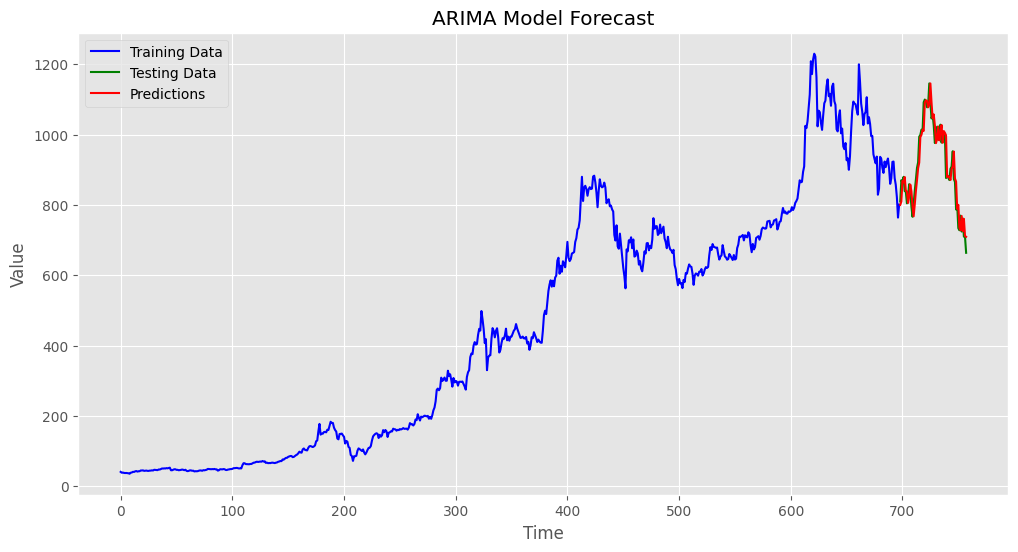

In [181]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(X_train, label='Training Data', color='blue')
plt.plot( X_test, label='Testing Data', color='green')
plt.plot( fc_series, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()